<a href="https://colab.research.google.com/github/Mohammadindrakholid/Pembelajaran_Mesin/blob/main/UTS_Prediksi_diabetes_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #KNN
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan data uji
from sklearn.neighbors import KNeighborsClassifier  # Untuk algoritma KNN
from sklearn.metrics import accuracy_score, classification_report  # Untuk evaluasi model

#Load package drive
from google.colab import drive

#Memberikan akses kepada colab/autorization
drive.mount('/content/drive')

#Buat variable jalur/path dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuliah/Pembelajaran Mesin/data_set/diabetes.csv')

# Memisahkan fitur (X) dan target (y) dari dataset
X = data.drop(columns=['Outcome'])  # Menghapus kolom 'Outcome' untuk dijadikan fitur
y = data['Outcome']                 # Mengambil kolom 'Outcome' sebagai target

# Membagi data menjadi data latih dan data uji
# 80% data akan digunakan untuk melatih model, dan 20% sisanya untuk menguji model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model K-Nearest Neighbors dengan k=11 (tetangga terdekat)
knn = KNeighborsClassifier(n_neighbors=13)

# Melatih model KNN pada data latih
knn.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data uji
y_pred = knn.predict(X_test)

# Data baru untuk diprediksi, misalnya:
data_baru = pd.DataFrame([[6, 500, 72, 35, 0, 33.6, 0.627, 50]],
                         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Melakukan prediksi pada data baru
prediction = knn.predict(data_baru)

# Menampilkan hasil prediksi
if prediction[0] == 1:
    print("Prediksi: Pasien memiliki diabetes (1).")
else:
    print("Prediksi: Pasien tidak memiliki diabetes (0).")

    # Menghitung akurasi prediksi model pada data uji dan mencetak laporan klasifikasi
print("Accuracy:", accuracy_score(y_test, y_pred))  # Mencetak akurasi model
print("Classification Report:\n", classification_report(y_test, y_pred))  # Menampilkan detail performa model

import numpy as np
error_rate = []
for i in range(10, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # != instead of l=

print("Minimum error:-", min(error_rate), "at K =", error_rate.index(min(error_rate)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Prediksi: Pasien memiliki diabetes atau 1.
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Minimum error:- 0.22077922077922077 at K = 2


In [ ]:
#Desicion tree
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Untuk Decision Tree
from sklearn.metrics import accuracy_score, classification_report  # Untuk evaluasi model

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuliah/Pembelajaran Mesin/data_set/diabetes.csv')

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Outcome'])  # Menghapus kolom 'Outcome' untuk dijadikan fitur
y = data['Outcome']  # Mengambil kolom 'Outcome' sebagai target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Melatih model pada data latih
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = decision_tree.predict(X_test)

# Data baru untuk diprediksi, misalnya:
data_baru = pd.DataFrame([[6, 500, 72, 35, 0, 33.6, 0.627, 50]],
                         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Melakukan prediksi pada data baru
prediction = decision_tree.predict(data_baru)

# Menampilkan hasil prediksi pada data baru
if prediction[0] == 1:
    print("Prediksi: Pasien memiliki diabetes (1).")
else:
    print("Prediksi: Pasien tidak memiliki diabetes (0).")

# Evaluasi model: Menghitung akurasi dan menampilkan laporan klasifikasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Kuliah/Pembelajaran Mesin/data_set/diabetes.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Akurasi awal dengan K=13: 0.72
Nilai K terbaik adalah: 11


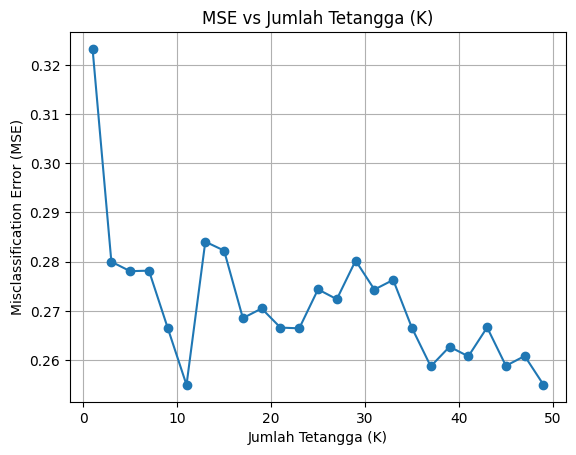

Prediksi: Pasien memiliki diabetes (1).
Akurasi akhir dengan K optimal (11): 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       168
           1       0.62      0.48      0.54        86

    accuracy                           0.72       254
   macro avg       0.69      0.66      0.67       254
weighted avg       0.71      0.72      0.71       254



In [ ]:
#KNN Modif
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

#Load package drive
from google.colab import drive

#Memberikan akses kepada colab/autorization
drive.mount('/content/drive')

# Load dataset diabetes
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuliah/Pembelajaran Mesin/data_set/diabetes.csv')

# Memisahkan fitur (X) dan target (y)
X = np.array(data.iloc[:, :-1])  # Semua kolom kecuali 'Outcome'
y = np.array(data['Outcome'])    # Kolom 'Outcome'

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Inisialisasi model KNN dengan K=13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

# Evaluasi akurasi awal
accuracy = knn.score(X_test, y_test)
print(f"Akurasi awal dengan K=13: {accuracy:.2f}")

# Menentukan nilai K terbaik menggunakan cross-validation
neighbors = []
cv_scores = []

for k in range(1, 51, 2):  # Coba nilai K ganjil dari 1 hingga 50
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Hitung Mean Squared Error (MSE) dari cross-validation
MSE = [1 - x for x in cv_scores]

# Menentukan nilai K optimal
optimal_k = neighbors[MSE.index(min(MSE))]
print(f"Nilai K terbaik adalah: {optimal_k}")

# Plot MSE terhadap jumlah tetangga
plt.plot(neighbors, MSE, marker='o')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Misclassification Error (MSE)')
plt.title('MSE vs Jumlah Tetangga (K)')
plt.grid(True)
plt.show()

# Melatih model dengan K optimal
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Data baru untuk prediksi
data_baru = np.array([[6, 500, 72, 35, 0, 33.6, 0.627, 50]])

  # Prediksi menggunakan model KNN
prediction = knn.predict(data_baru)

  # Menampilkan hasil prediksi
if prediction[0] == 1:
    print("Prediksi: Pasien memiliki diabetes (1).")
else:
    print("Prediksi: Pasien tidak memiliki diabetes (0).")

# Evaluasi Akhir
accuracy_final = accuracy_score(y_test, y_pred)
print(f"Akurasi akhir dengan K optimal ({optimal_k}): {accuracy_final:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
